Dataset:


,Hours,Scores,Passed
0,1,35,0
1,2,40,0
2,3,50,0
3,4,55,0
4,5,60,1
5,6,65,1
6,7,70,1
7,8,75,1
8,9,80,1
9,10,85,1


Task 3


,Model,Accuracy,F1 Score,Coefficients
0,No Regularization,1.0,1.0,"[26.612402946263973, -1.9987946602492008]"
1,L1 Regularization,1.0,1.0,"[1.5785314895932212, -0.12132475885048818]"
2,L2 Regularization,1.0,1.0,"[0.14413234067822042, 0.720734445916003]"


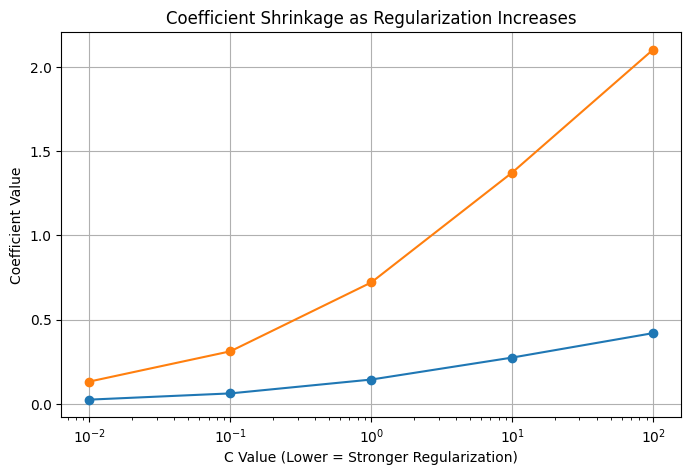

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

data = {
    "Hours": [1,2,3,4,5,6,7,8,9,10],
    "Scores": [35,40,50,55,60,65,70,75,80,85],
    "Passed": [0,0,0,0,1,1,1,1,1,1]
}
df = pd.DataFrame(data)

X = df[['Hours','Scores']]
y = df['Passed']

print("Dataset:")
display(df)

#TASK 3: APPLY REGULARIZATION

model_none = LogisticRegression(C=1e10, penalty="l2", solver="lbfgs").fit(X, y)# No regularization (simulate with very large C)

model_l1 = LogisticRegression(penalty="l1", solver="liblinear").fit(X, y)# L1 regularization

model_l2 = LogisticRegression(penalty="l2", solver="lbfgs").fit(X, y)# L2 regularization

models = {
    "No Regularization": model_none,
    "L1 Regularization": model_l1,
    "L2 Regularization": model_l2
}


results = []# Collect results
for name, model in models.items():
    pred = model.predict(X)
    acc = accuracy_score(y, pred)
    f1 = f1_score(y, pred)
    coef = model.coef_[0]
    results.append([name, acc, f1, coef])

results_df = pd.DataFrame(results, columns=["Model","Accuracy","F1 Score","Coefficients"])

print("Task 3")
display(results_df)


#TASK 4: COEFFICIENT SHRINKAGE PLOT

C_values = [0.01, 0.1, 1, 10, 100]
coef_list = []

for C in C_values:
    model = LogisticRegression(penalty="l2", C=C, solver="lbfgs")
    model.fit(X, y)
    coef_list.append(model.coef_[0])

coef_array = np.array(coef_list)

plt.figure(figsize=(8,5))
for i in range(coef_array.shape[1]):
    plt.plot(C_values, coef_array[:, i], marker='o')

plt.xscale("log")
plt.xlabel("C Value (Lower = Stronger Regularization)")
plt.ylabel("Coefficient Value")
plt.title("Coefficient Shrinkage as Regularization Increases")
plt.grid(True)
plt.show()